<a href="https://colab.research.google.com/github/Harishchand83077/LSTM-stock-price-prediction/blob/main/intraday_stock_price_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
!pip install tensorflow

In [3]:
path="/content/AMZN.csv"
df=pd.read_csv(path)
df.columns = ['timestamp', 'open', 'high', 'low','Adj Close', 'close', 'volume']
df

,timestamp,open,high,low,Adj Close,close,volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,3268.159912,2790600


In [4]:
df.drop(columns=['Adj Close'],inplace=True)

In [5]:
total_rows = len(df)
rows_to_keep = int(0.10 * total_rows)

# Keep only the last 10% of the data
df= df[-rows_to_keep:]
df

,timestamp,open,high,low,close,volume
5632,2019-10-02,1727.739990,1728.890015,1705.000000,1713.229980,3301100
5633,2019-10-03,1713.000000,1725.000000,1685.060059,1724.420044,3468200
5634,2019-10-04,1726.020020,1740.579956,1719.229980,1739.650024,2471900
5635,2019-10-07,1731.630005,1747.829956,1723.699951,1732.660034,2154700
5636,2019-10-08,1722.489990,1727.000000,1705.000000,1705.510010,2542000
...,...,...,...,...,...,...
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,2790600


In [6]:
df=df[['timestamp','close']]
df.head(3)

,timestamp,close
5632,2019-10-02,1713.229980
5633,2019-10-03,1724.420044
5634,2019-10-04,1739.650024


In [7]:
df.shape

(625, 2)

<ipython-input-8-a2d8e5bdef39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp']=pd.to_datetime(df['timestamp'])


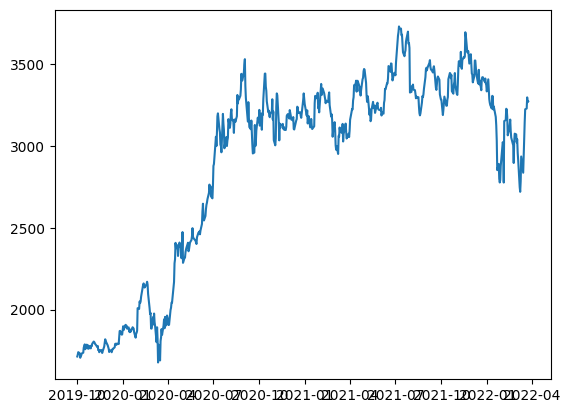

In [8]:
df['timestamp']=pd.to_datetime(df['timestamp'])
plt.plot(df['timestamp'],df['close'])

In [9]:
price = df[['close']]
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 5632 to 6256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   625 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB


In [10]:
#Normalizing with QuantileTransformer
from sklearn.preprocessing import QuantileTransformer

# Instantiate the QuantileTransformer with desired parameters
scaler = QuantileTransformer(output_distribution='uniform')

# Fit and transform the 'close' prices using the QuantileTransformer
price['close'] = scaler.fit_transform(price['close'].values.reshape(-1, 1))

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (625). n_quantiles is set to n_samples.
  warnings.warn(
<ipython-input-10-7002d2cf50a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['close'] = scaler.fit_transform(price['close'].values.reshape(-1, 1))


I have considered two Normalizer **MinMaxScaker** and **QuantileTransformer**. I have Used The QuantileTransformer because i got better result with QuantileTransformer as it a was found it is good with time series data

In [11]:
price['close']

,close
5632,0.004808
5633,0.009615
5634,0.020833
5635,0.012821
5636,0.003205
...,...
6252,0.616987
6253,0.623397
6254,0.713141
6255,0.668269


In [12]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# scaled_df=scaler.fit_transform(shifted_df_np)
# scaled_df

I have considered the Minute data or **Intraday Trading**

In [13]:
#Spliting the data for the supervised case of predicting the time series with given
# 15 column data to predict the 16th column value
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []

    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])

    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);

    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]

    return [x_train, y_train, x_test, y_test]

In [14]:
# choose sequence length
lookback = 15

#calling the Split_data function
x_train, y_train, x_test, y_test = split_data(price, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (488, 14, 1)
y_train.shape =  (488, 1)
x_test.shape =  (122, 14, 1)
y_test.shape =  (122, 1)


In [15]:
# from copy import deepcopy as dc
# def prepare_data_lstm(df,n_steps):
#   df=dc(df) # now any changes only occur to it's copy
#   df.set_index('timestamp', inplace=True)
#   for i in range(1,n_steps+1):
#     df[f'close(t-{i})']=df['close'].shift(i)  # It generates new columns representing past values of the close column.
#     df.dropna(inplace=True)               # Since shifting creates NaN values in the first n_steps rows
#   return df
# lookback=20        #we are takin 20 previous data to predic 21th
# shifted_df=prepare_data_lstm(df,lookback)
# shifted_df

In [16]:
# x=dc(np.flip(x,axis=1))
# x

In [17]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Convert NumPy arrays to TensorFlow tensors
x_train_tf = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test_tf = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Print tensor shapes to verify
print(x_train_tf.shape, x_test_tf.shape, y_train_tf.shape, y_test_tf.shape)


(488, 14, 1) (122, 14, 1) (488, 1) (122, 1)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train_tf.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train_tf, y_train_tf, batch_size=1, epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0415
Epoch 2/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0097
Epoch 3/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0076
Epoch 4/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0062
Epoch 5/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0045
Epoch 6/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0049
Epoch 7/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0042
Epoch 8/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0039
Epoch 9/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0043
Epoch 10/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0047
Epoch 11/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0037
Epoch 12/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0051
Epoch 13/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0039
Epoch 14/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0049
Epoch 15/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

In [32]:
y_train_pred=model(x_train_tf)

In [33]:
import numpy as np
#forming a dataframe which has inverse tranformed close price of actual and the trained values
# Convert TensorFlow tensors to NumPy arrays
y_train_pred_np = y_train_pred.numpy()
y_train_np = y_train_tf.numpy()

# Apply inverse transformation using the scaler
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred_np))
original = pd.DataFrame(scaler.inverse_transform(y_train_np))

In [34]:
y_test_pred = model(x_test_tf)

In [35]:
#Calculting the RMSE for Train and Test datset
import math, time
from sklearn.metrics import mean_squared_error
y_train_pred = scaler.inverse_transform(y_train_pred_np)
y_train = scaler.inverse_transform(y_train_np)
y_test_pred = scaler.inverse_transform(y_test_pred.numpy())
y_test = scaler.inverse_transform(y_test_tf.numpy())
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)

Train Score: 69.29 RMSE
Test Score: 88.51 RMSE


In [36]:
y_train

array([[1765.73  ],
       [1762.17  ],
       [1780.78  ],
       [1761.33  ],
       [1777.08  ],
       [1762.71  ],
       [1779.99  ],
       [1776.66  ],
       [1791.44  ],
       [1804.66  ],
       [1801.71  ],
       [1795.77  ],
       [1788.2   ],
       [1785.88  ],
       [1771.65  ],
       [1778.    ],
       [1753.11  ],
       [1754.6   ],
       [1739.49  ],
       [1752.53  ],
       [1752.79  ],
       [1745.53  ],
       [1734.71  ],
       [1745.72  ],
       [1773.84  ],
       [1796.94  ],
       [1818.51  ],
       [1800.8   ],
       [1781.6   ],
       [1769.96  ],
       [1760.69  ],
       [1740.48  ],
       [1751.6   ],
       [1749.51  ],
       [1739.21  ],
       [1748.72  ],
       [1760.33  ],
       [1760.94  ],
       [1769.21  ],
       [1790.66  ],
       [1784.03  ],
       [1792.28  ],
       [1786.5   ],
       [1793.    ],
       [1789.21  ],
       [1868.77  ],
       [1869.8   ],
       [1846.89  ],
       [1847.84  ],
       [1898.01  ],


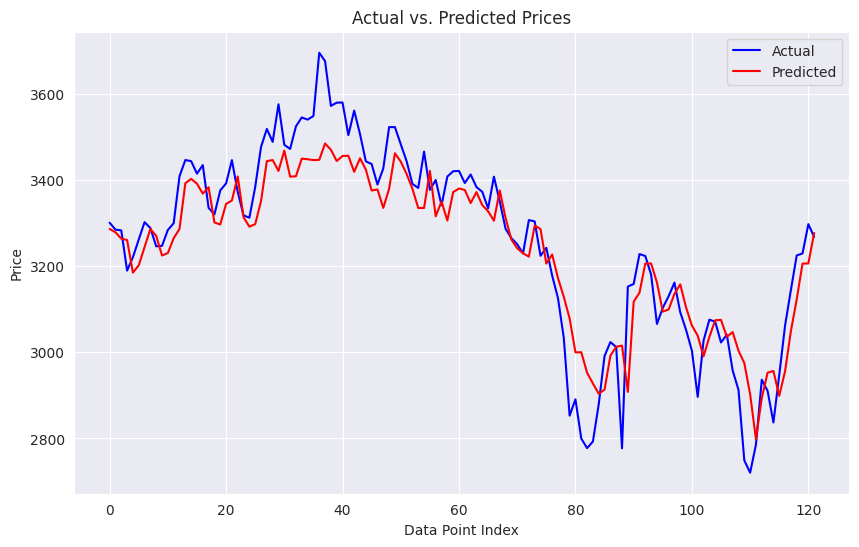

In [39]:
#Plotting the Predicted abd actual Close price values
x = np.arange(len(y_test))

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the actual values (y_test) in blue
plt.plot(x, y_test, label='Actual', color='blue')

# Plot the predicted values (y_test_pred) in orange
plt.plot(x, y_test_pred, label='Predicted', color='red')

# Set axis labels and legend
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.title('Actual vs. Predicted Prices')
plt.show()

In [30]:
print("Actual Values:", y_test.min(), y_test.max())
print("Predicted Values:", y_test_pred.min(), y_test_pred.max())


Actual Values: 3731.409912 3731.409912
Predicted Values: 3019.7644 3416.4707


In [63]:
y_test

array([[3301.120117],
       [3285.040039],
       [3283.26001 ],
       [3189.780029],
       [3221.      ],
       [3262.01001 ],
       [3302.429932],
       [3288.620117],
       [3246.300049],
       [3247.330078],
       [3284.280029],
       [3299.860107],
       [3409.02002 ],
       [3446.73999 ],
       [3444.149902],
       [3415.060059],
       [3435.01001 ],
       [3335.550049],
       [3320.370117],
       [3376.070068],
       [3392.48999 ],
       [3446.570068],
       [3372.429932],
       [3318.110107],
       [3312.75    ],
       [3384.      ],
       [3477.      ],
       [3518.98999 ],
       [3488.97998 ],
       [3576.22998 ],
       [3482.050049],
       [3472.5     ],
       [3525.149902],
       [3545.679932],
       [3540.699951],
       [3549.      ],
       [3696.060059],
       [3676.570068],
       [3572.570068],
       [3580.040039],
       [3580.409912],
       [3504.560059],
       [3561.570068],
       [3507.070068],
       [3443.719971],
       [34